In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Sagar\anaconda3\envs\CapstoneProjecct\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [3]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,2,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,2,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,2,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,2,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,0,174


In [4]:
df.shape

(3803, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [6]:
df.duplicated().sum()

126

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,2,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,2,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,2,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,2,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,0,174


# property_type

<Axes: xlabel='property_type'>

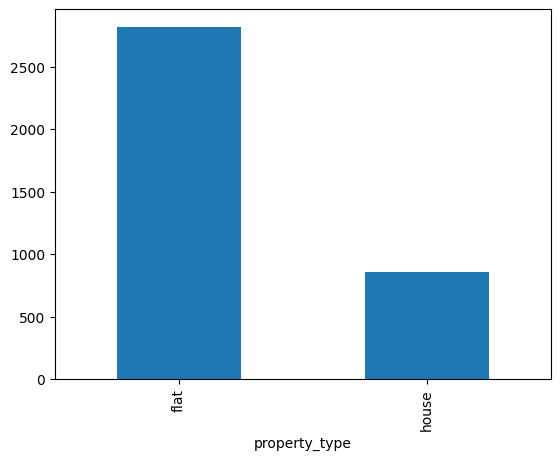

In [9]:
df['property_type'].value_counts().plot(kind='bar',)

# Society

In [10]:
# High cardinality number

df['society'].value_counts().shape

(676,)

In [11]:
df['society'].value_counts()

society
independent                               486
tulip violet                               75
ss the leaf                                73
dlf new town heights                       42
shapoorji pallonji joyville gurugram       42
                                         ... 
dlf gardencity enclave                      1
nitin vihar                                 1
landmark the residency                      1
kw royal court                              1
surendra homes dayaindependentd colony      1
Name: count, Length: 676, dtype: int64

In [12]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.023511
ss the leaf                             0.046395
shapoorji pallonji joyville gurugram    0.059561
dlf new town heights                    0.072727
signature global park                   0.083699
                                          ...   
ramsons kshitij                         0.490282
umang monsoon breeze                    0.494357
ats kocoon                              0.498433
ireo the corridors                      0.502194
central park flower valley              0.505956
Name: proportion, Length: 75, dtype: float64

In [13]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 273,
 'Very Low (1)': 308}

<Axes: xlabel='society'>

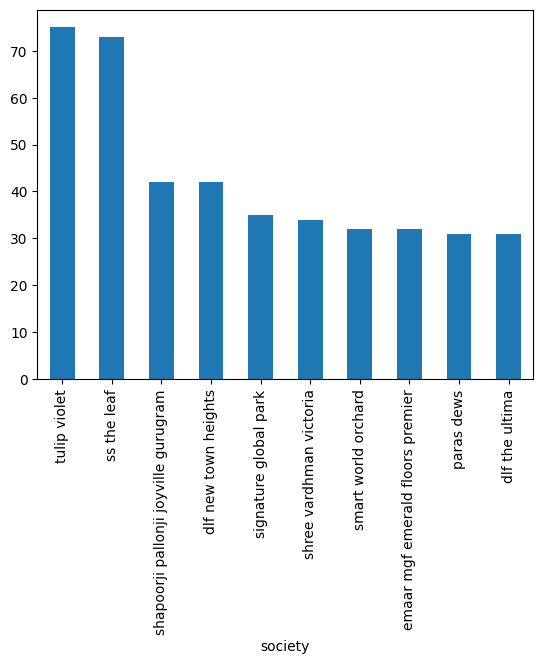

In [14]:
# top 10 socities
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [15]:
df['society'].isnull().sum()

1

In [16]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2693,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,...,NaN,1625.0,NaN,0,0,0,0,0,2,0


# Sector

In [17]:
# unique sectors
df['sector'].value_counts().shape

(113,)

<Axes: xlabel='sector'>

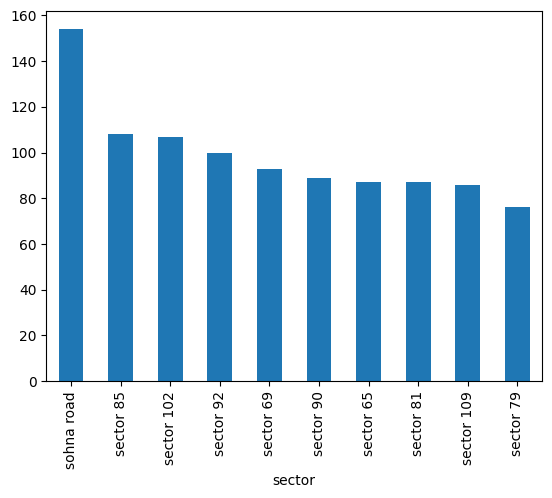

In [18]:
# top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [19]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 25,
 'Average (10-49)': 63,
 'Low (2-9)': 21,
 'Very Low (1)': 1}

# Prise

In [20]:
df['price'].isnull().sum()

17

In [21]:
df['price'].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

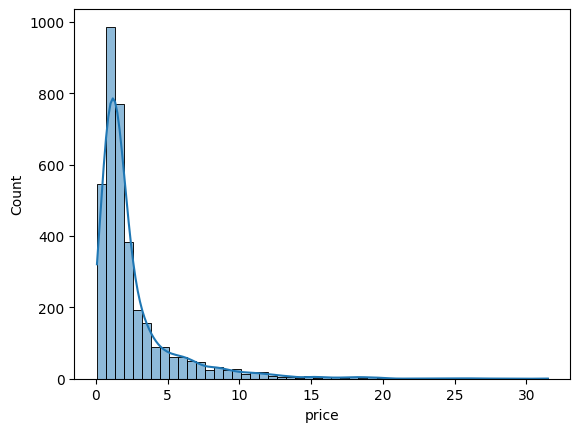

In [22]:
sns.histplot(df['price'], kde=True, bins=50)

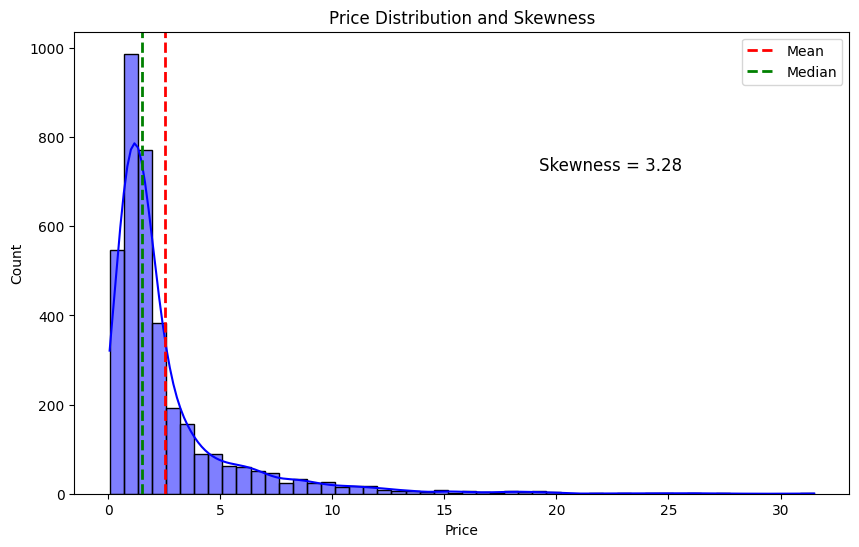

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate skewness
skewness = df['price'].skew()

# Create a histogram for the 'price' column with more bins
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50, color='blue')

# Add a vertical line to indicate skewness
plt.axvline(df['price'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df['price'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')

# Annotate the skewness value
plt.text(0.6, 0.7, f'Skewness = {skewness:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Set plot labels and legend
plt.xlabel('Price')
plt.title('Price Distribution and Skewness')
plt.legend()

# Show the plot
plt.show()


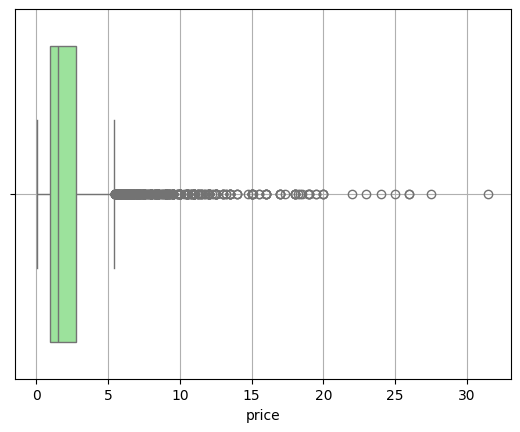

In [24]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

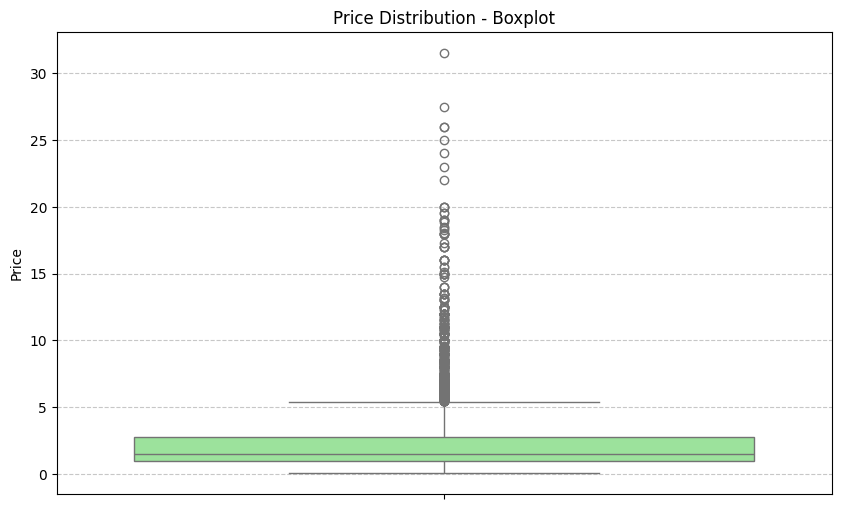

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a horizontal boxplot for the 'price' column
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['price'], color='lightgreen')

# Add a grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set plot labels and title
plt.ylabel('Price')
plt.title('Price Distribution - Boxplot')

# Show the plot
plt.show()


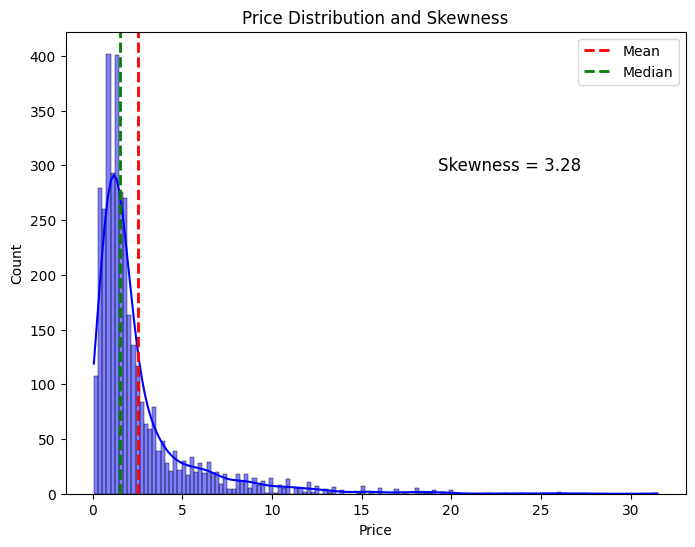

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate skewness and kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

# Create a histogram for the 'price' column
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, color='blue')

# Add a vertical line to indicate skewness
plt.axvline(df['price'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df['price'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')

# Annotate the skewness value
plt.text(0.6, 0.7, f'Skewness = {skewness:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Set plot labels and legend
plt.xlabel('Price')
plt.title('Price Distribution and Skewness')
plt.legend()

# Show the plot
plt.show()


In [27]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.2791704733134623 14.933372629214258


In [28]:
df

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,2,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,2,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,2,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,2,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,0,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,flat,pivotal devaan,sector 84,0.37,6346.0,583.0,Super Built up area 583(54.16 sq.m.)Carpet are...,2,2,1,...,583.0,NaN,483.0,0,0,0,0,0,2,73
3799,house,international city by sobha phase 1,sector 109,6.00,9634.0,6228.0,Plot area 692(578.6 sq.m.),5,5,3+,...,NaN,6228.0,NaN,1,1,1,1,0,2,160
3800,flat,ansal api celebrity suites,sector 2,0.60,8163.0,735.0,Super Built up area 735(68.28 sq.m.),1,1,1,...,735.0,NaN,NaN,0,0,0,0,0,0,67
3801,house,independent,sector 43,15.50,28233.0,5490.0,Plot area 610(510.04 sq.m.),5,6,3,...,NaN,5490.0,NaN,1,1,1,1,0,2,76


In [29]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.264
Name: price, dtype: float64

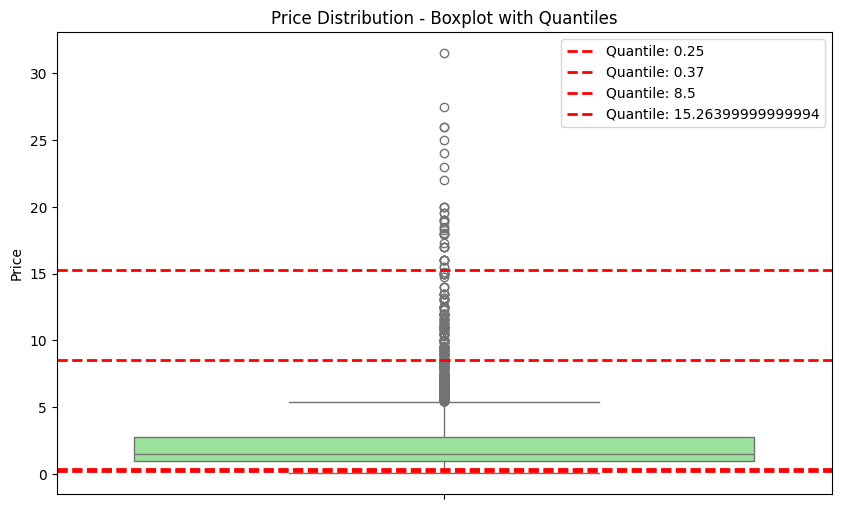

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for the 'price' column
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['price'], color='lightgreen')

# Calculate the quantiles
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

# Add horizontal lines for the quantiles
for quantile in quantiles:
    plt.axhline(quantile, color='red', linestyle='dashed', linewidth=2, label=f'Quantile: {quantile}')

# Set plot labels and title
plt.ylabel('Price')
plt.title('Price Distribution - Boxplot with Quantiles')

# Show the plot
plt.legend()
plt.show()


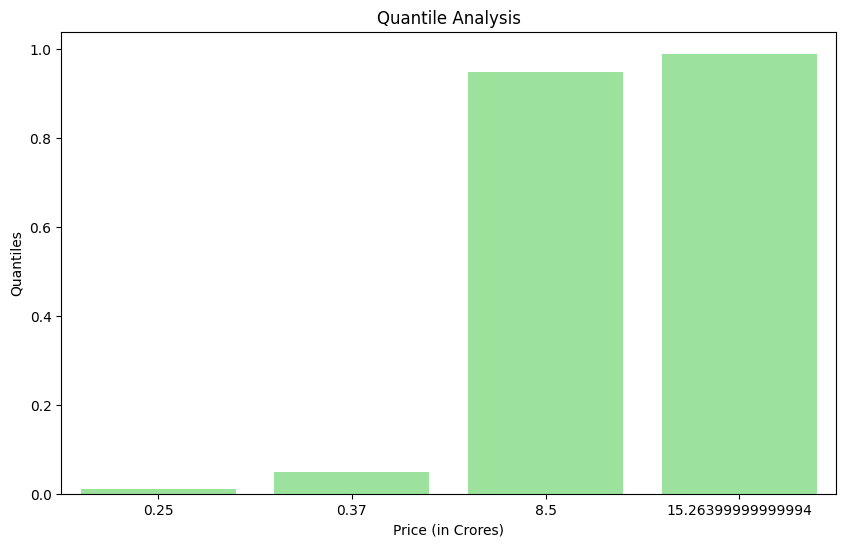

 1% Quantile: 0.25 crores
 5% Quantile: 0.37 crores
95% Quantile: 8.50 crores
99% Quantile: 15.26 crores

Quantile Analysis:
- 1% Quantile: Only 1% of properties are priced below 0.25 crores.
- 5% Quantile: 5% of properties are priced below 0.37 crores.
- 95% Quantile: 95% of properties are priced below 8.5 crores.
- 99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the quantiles
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

# Create a bar plot with custom tick labels
plt.figure(figsize=(10, 6))
sns.barplot(x=quantiles, y=quantiles.index, color='lightgreen')

# Set labels and title
plt.xlabel('Price (in Crores)')
plt.ylabel('Quantiles')
plt.title('Quantile Analysis')

# Show the plot
plt.show()

# Display the quantile analysis as text
for quantile, value in quantiles.items():
    print(f"{int(quantile * 100):2d}% Quantile: {value:.2f} crores")

# Additional information
print("\nQuantile Analysis:")
print("- 1% Quantile: Only 1% of properties are priced below 0.25 crores.")
print("- 5% Quantile: 5% of properties are priced below 0.37 crores.")
print("- 95% Quantile: 95% of properties are priced below 8.5 crores.")
print("- 99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.")


In [32]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

1.8

In [33]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [34]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 23)

In [35]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

C:\Users\Sagar\AppData\Local\Temp\ipykernel_24024\4002988384.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bin_counts.index, y=bin_counts.values, palette='pastel')


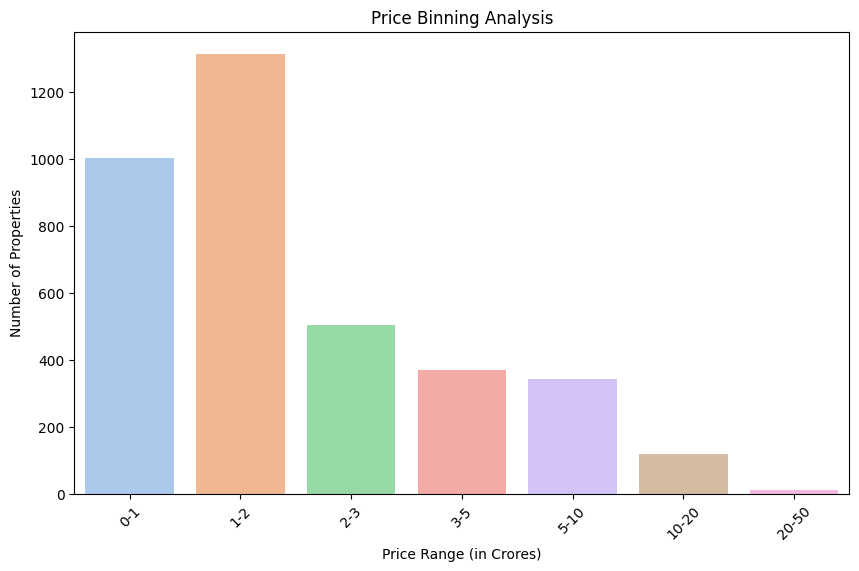

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the bin edges and labels
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]

# Create price bins
df['price_bins'] = pd.cut(df['price'], bins=bins, labels=bin_labels, right=False)

# Count the properties in each price bin
bin_counts = df['price_bins'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=bin_counts.index, y=bin_counts.values, palette='pastel')

# Set labels and title
plt.xlabel('Price Range (in Crores)')
plt.ylabel('Number of Properties')
plt.title('Price Binning Analysis')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


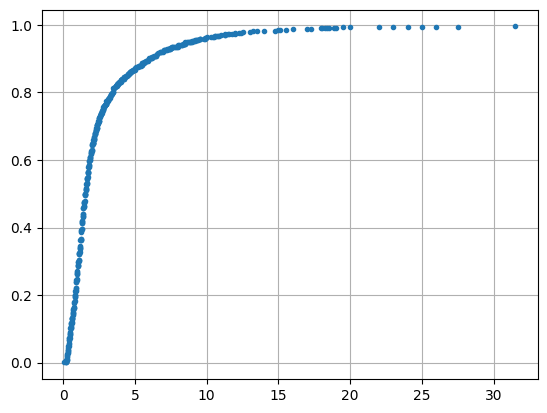

In [37]:
# ecdf plot
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

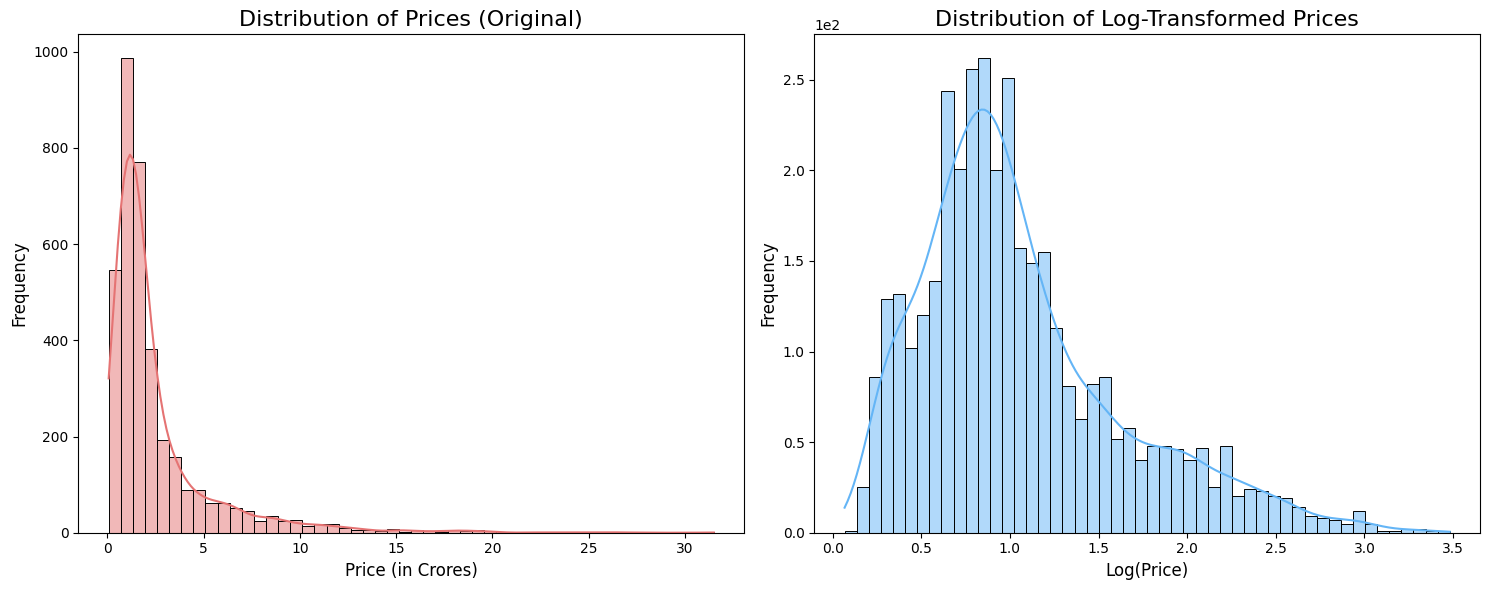

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a beautiful color palette
beautiful_palette = ['#e57373', '#64b5f6', '#81c784', '#ffb74d', '#9575cd']

# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# Subplot 1: Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color=beautiful_palette[0], edgecolor='black')
plt.title('Distribution of Prices (Original)', fontsize=16)
plt.xlabel('Price (in Crores)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Subplot 2: Distribution plot with log transformation
plt.subplot(1, 2, 2)
log_transformed_prices = np.log1p(df['price'])  # Log transformation
sns.histplot(log_transformed_prices, kde=True, bins=50, color=beautiful_palette[1], edgecolor='black')
plt.title('Distribution of Log-Transformed Prices', fontsize=16)
plt.xlabel('Log(Price)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Set y-axis labels to scientific notation
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [39]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0740709565255315 0.9646692415449296


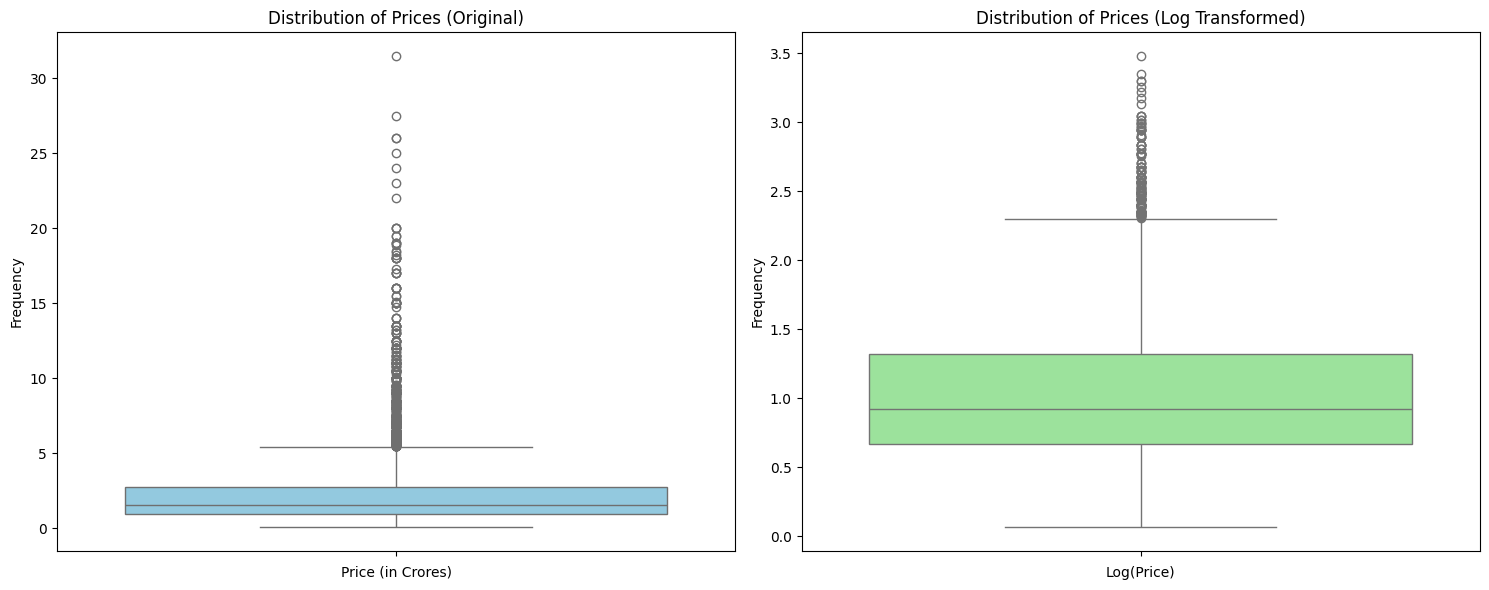

In [40]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# price_per_sqft

In [41]:
df['price_per_sqft'].isnull().sum()

17

In [42]:
df['price_per_sqft'].describe()

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

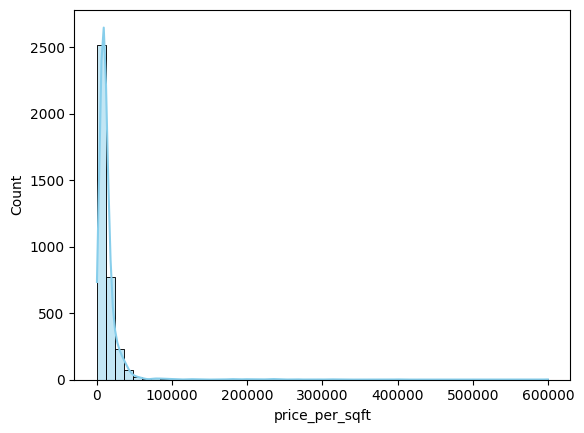

In [43]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='price_per_sqft'>

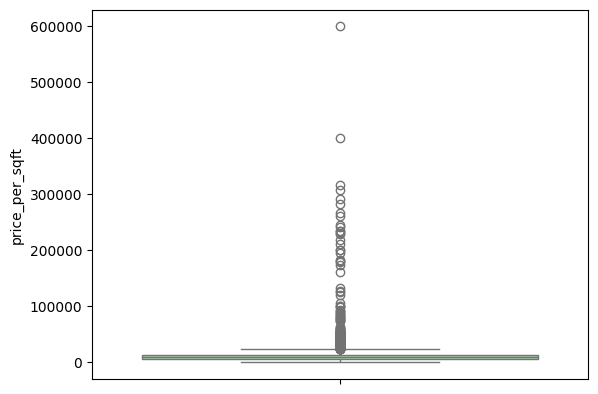

In [44]:
sns.boxplot(df['price_per_sqft'], color='lightgreen')

# BedRoom

<Axes: xlabel='bedRoom'>

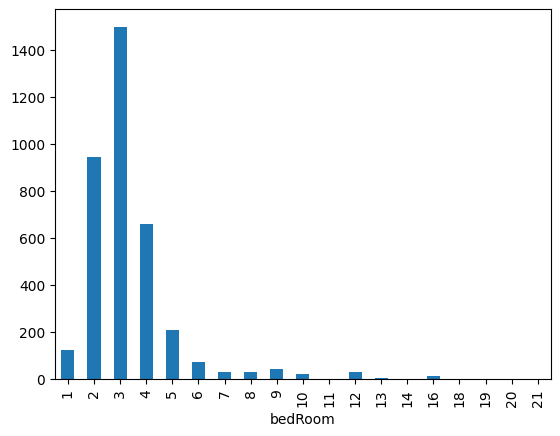

In [45]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

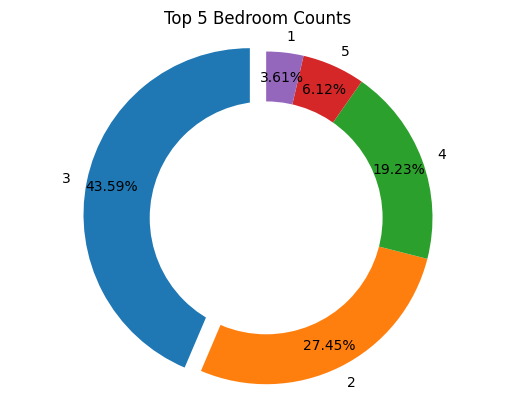

In [46]:
import matplotlib.pyplot as plt

# Get the top 5 most common 'bedRoom' values and their percentages
top_bedroom_counts = df['bedRoom'].value_counts(normalize=True).head()

# Labels for the pie chart
labels = top_bedroom_counts.index
# Values for the pie chart
sizes = top_bedroom_counts.values
# Explode the slice with the highest percentage (0.1 indicates the 10% offset)
explode = (0.1, 0, 0, 0, 0)

# Create a donut plot (ring chart)
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%0.2f%%', startangle=90, pctdistance=0.85, explode=explode)
ax.add_artist(plt.Circle((0, 0), 0.70, fc='white'))

# Set a title
plt.title('Top 5 Bedroom Counts')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# BathRoom

In [47]:
df['bathroom'].isnull().sum()

0

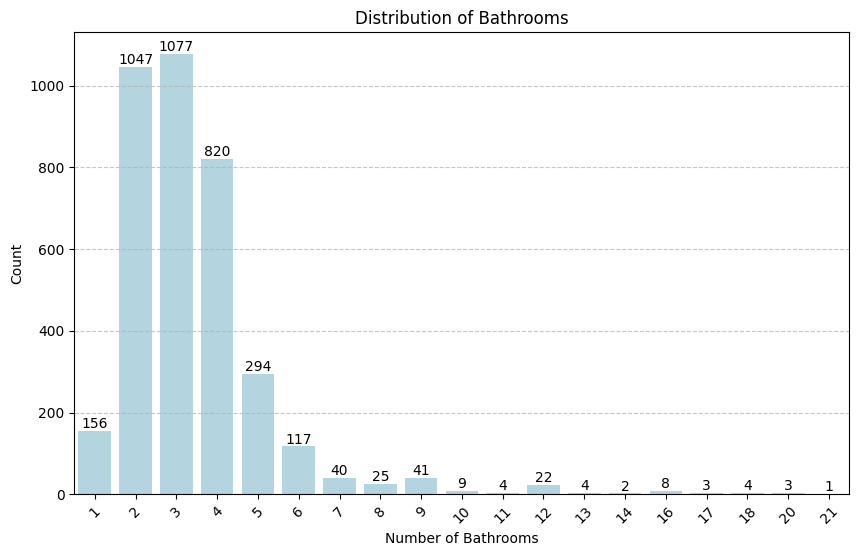

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the value counts for 'bathroom' and sort them by index
bathroom_counts = df['bathroom'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=bathroom_counts.index, y=bathroom_counts.values, color='lightblue')

# Set labels and title
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.title('Distribution of Bathrooms')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Annotate the bars with their values
for i, count in enumerate(bathroom_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


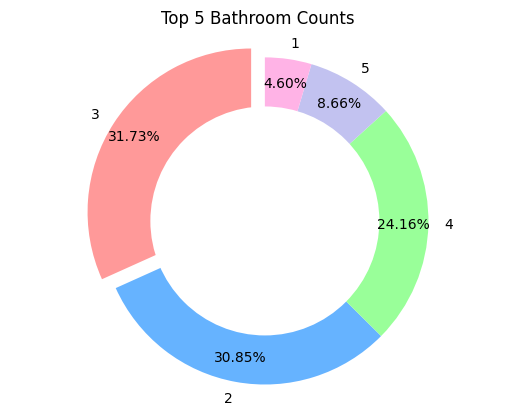

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the top 5 most common 'bathroom' values and their percentages
bathroom_counts = df['bathroom'].value_counts(normalize=True).head()
labels = bathroom_counts.index
sizes = bathroom_counts.values

# Explode a slice for emphasis
explode = (0.1, 0, 0, 0, 0)

# Create a color palette for the pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99', '#c2c2f0', '#ffb3e6']

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%0.2f%%', startangle=90, pctdistance=0.85, explode=explode, colors=colors)

# Add a circle at the center for a donut-like appearance
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(centre_circle)

# Set a title
plt.title('Top 5 Bathroom Counts')

# Display the plot
plt.axis('equal')
plt.show()


# Balcony

C:\Users\Sagar\AppData\Local\Temp\ipykernel_24024\2374003635.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=balcony_counts.index, y=balcony_counts.values, palette=beautiful_palette)


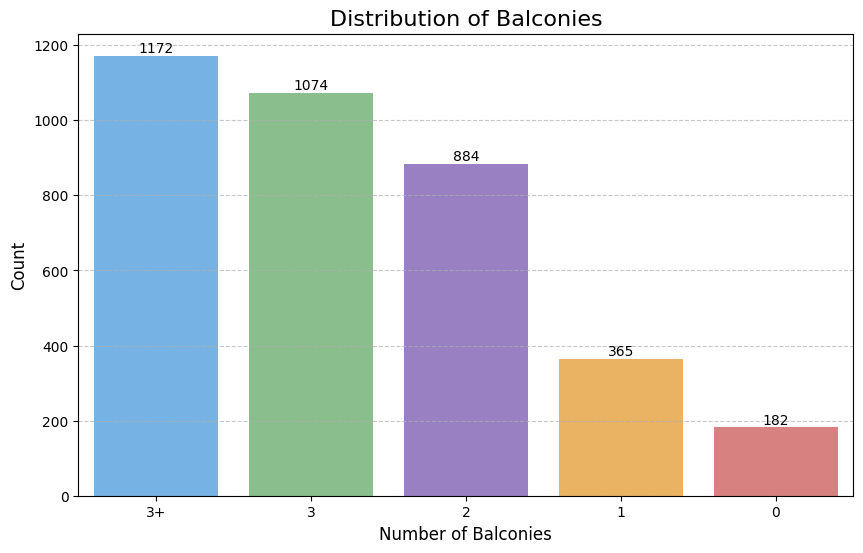

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a beautiful color palette
beautiful_palette = ['#64b5f6', '#81c784', '#9575cd', '#ffb74d', '#e57373']

# Get the value counts for 'balcony'
balcony_counts = df['balcony'].value_counts()

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create a bar plot with the custom color palette
sns.barplot(x=balcony_counts.index, y=balcony_counts.values, palette=beautiful_palette)

# Set labels and title
plt.xlabel('Number of Balconies', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Balconies', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Annotate the bars with their values
for i, count in enumerate(balcony_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

# Customize the grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


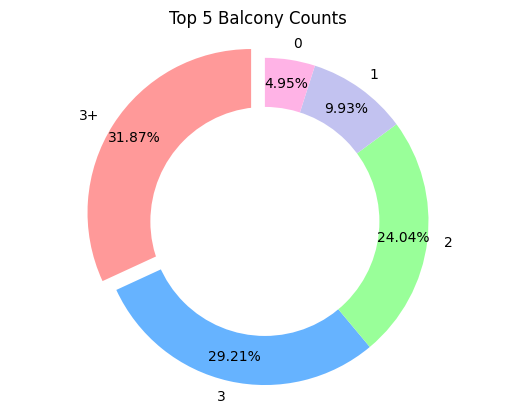

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the top 5 most common 'balcony' values and their percentages
top_balcony_counts = df['balcony'].value_counts(normalize=True).head()
labels = top_balcony_counts.index
sizes = top_balcony_counts.values

# Create a custom color palette
colors = ['#ff9999', '#66b3ff', '#99ff99', '#c2c2f0', '#ffb3e6']

# Explode a slice for emphasis
explode = (0.1, 0, 0, 0, 0)

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%0.2f%%', startangle=90, pctdistance=0.85, explode=explode, colors=colors)

# Add a circle at the center for a donut-like appearance
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(centre_circle)

# Set a title
plt.title('Top 5 Balcony Counts')

# Display the plot
plt.axis('equal')
plt.show()


In [52]:
df.iloc[:,10:].head()

,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,price_bins
0,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,2,8,0-1
1,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,2,38,0-1
2,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,2,15,0-1
3,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,2,49,0-1
4,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,0,174,1-2


# FloorNumber

In [53]:
df['floorNum'].isnull().sum()

19

In [54]:
df['floorNum'].describe()

count    3658.000000
mean        6.798250
std         6.012454
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

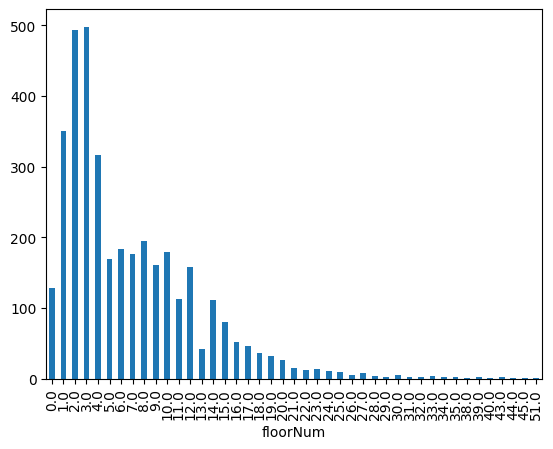

In [55]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

C:\Users\Sagar\AppData\Local\Temp\ipykernel_24024\130373403.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=floorNum_counts.index, y=floorNum_counts.values, palette='viridis')


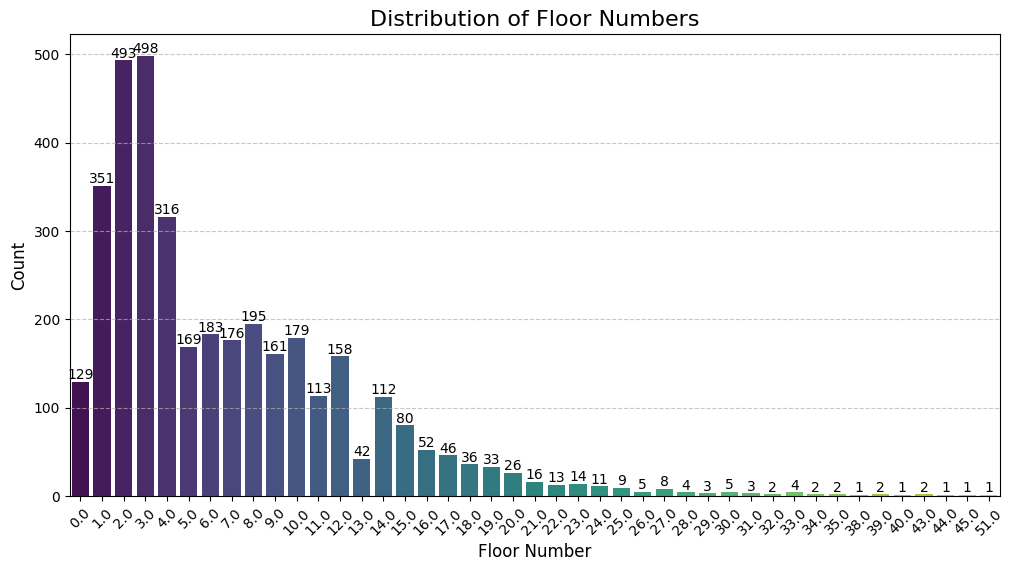

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the value counts for 'floorNum' and sort them by index
floorNum_counts = df['floorNum'].value_counts().sort_index()

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Create a bar plot with a custom color palette and rotation
sns.barplot(x=floorNum_counts.index, y=floorNum_counts.values, palette='viridis')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Set labels and title
plt.xlabel('Floor Number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Floor Numbers', fontsize=16)

# Annotate the bars with their values
for i, count in enumerate(floorNum_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

# Customize the grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


<Axes: ylabel='floorNum'>

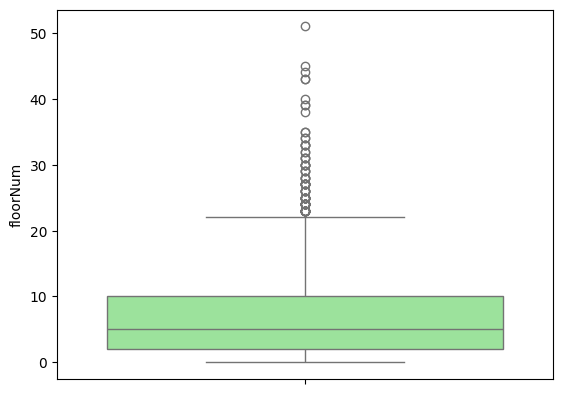

In [57]:
sns.boxplot(df['floorNum'], color='lightgreen')

# Facing

In [58]:
df['facing'].isnull().sum()

1045

In [59]:
df['facing'].fillna('NA',inplace=True)

In [60]:
df['facing'].value_counts()

facing
NA            1045
North-East     623
East           623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: count, dtype: int64

# Agepossesion

In [61]:
df['agePossession'].isnull().sum()

0

In [62]:
df['agePossession'].value_counts()

agePossession
Relatively New        1646
New Property           593
Moderately Old         563
Undefined              306
Old Property           303
Under Construction     266
Name: count, dtype: int64

# Area

In [63]:
# super built up area
df['super_built_up_area'].isnull().sum()

1802

In [64]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

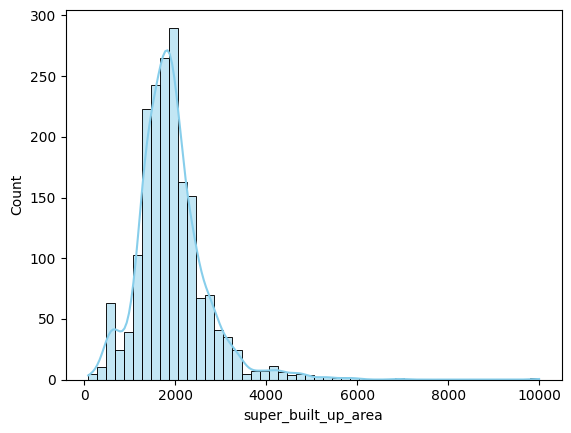

In [65]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: ylabel='super_built_up_area'>

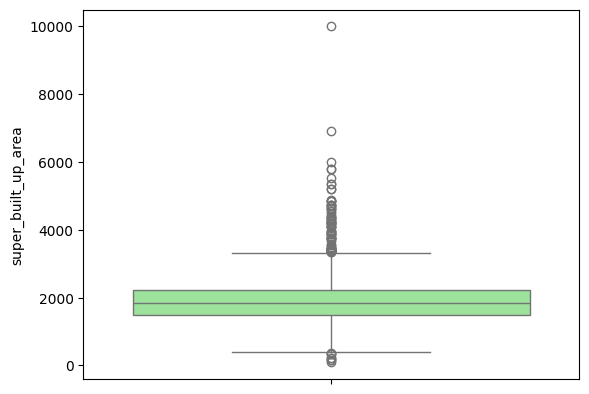

In [66]:
sns.boxplot(df['super_built_up_area'].dropna(), color='lightgreen')

In [67]:
# built up area
df['built_up_area'].isnull().sum()

1987

In [68]:
df['built_up_area'].describe()

count      1690.000000
mean       2379.585816
std       17942.880237
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

In [69]:
df['built_up_area'].describe()

count      1690.000000
mean       2379.585816
std       17942.880237
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

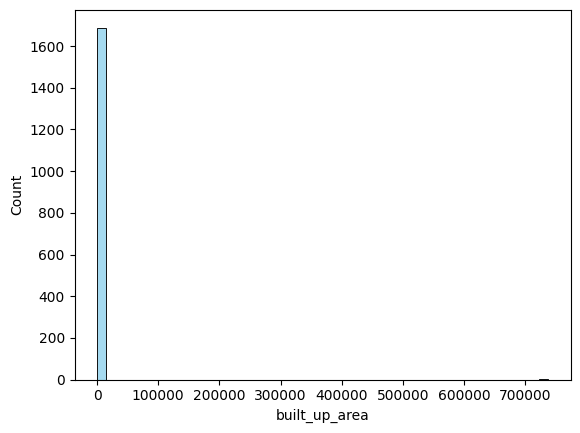

In [70]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='built_up_area'>

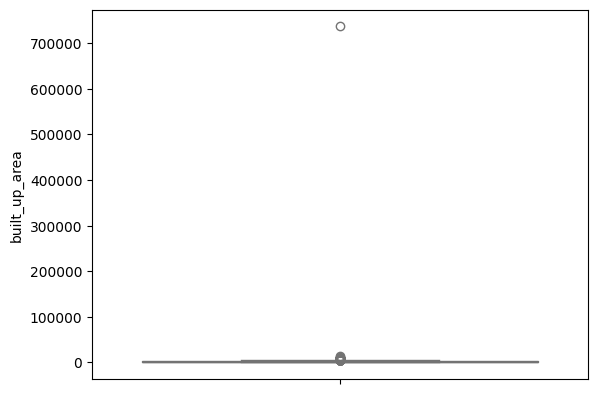

In [71]:
sns.boxplot(df['built_up_area'].dropna(), color='lightgreen')

In [72]:
# carpet area
df['carpet_area'].isnull().sum()

1805

In [73]:
df['carpet_area'].describe()

count      1872.000000
mean       2529.179507
std       22799.836449
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

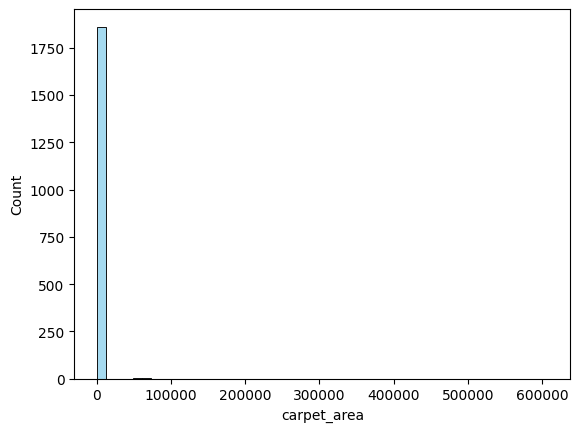

In [74]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='carpet_area'>

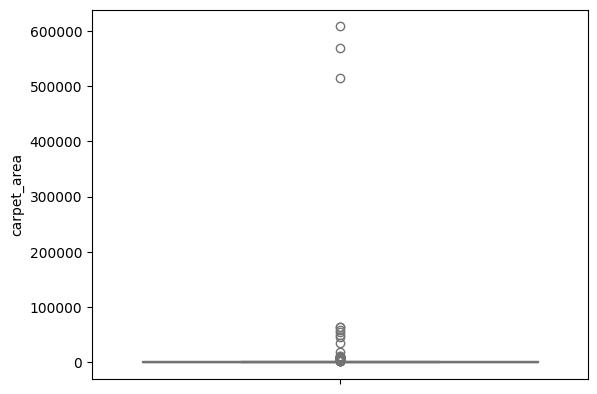

In [75]:
sns.boxplot(df['carpet_area'].dropna(), color='lightgreen')

In [76]:
df.iloc[:,16:]

,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,price_bins
0,0,0,0,0,0,2,8,0-1
1,1,1,0,0,0,2,38,0-1
2,0,0,0,0,0,2,15,0-1
3,0,0,0,0,0,2,49,0-1
4,0,1,0,0,1,0,174,1-2
...,...,...,...,...,...,...,...,...
3798,0,0,0,0,0,2,73,0-1
3799,1,1,1,1,0,2,160,5-10
3800,0,0,0,0,0,0,67,0-1
3801,1,1,1,1,0,2,76,10-20


# Additional room

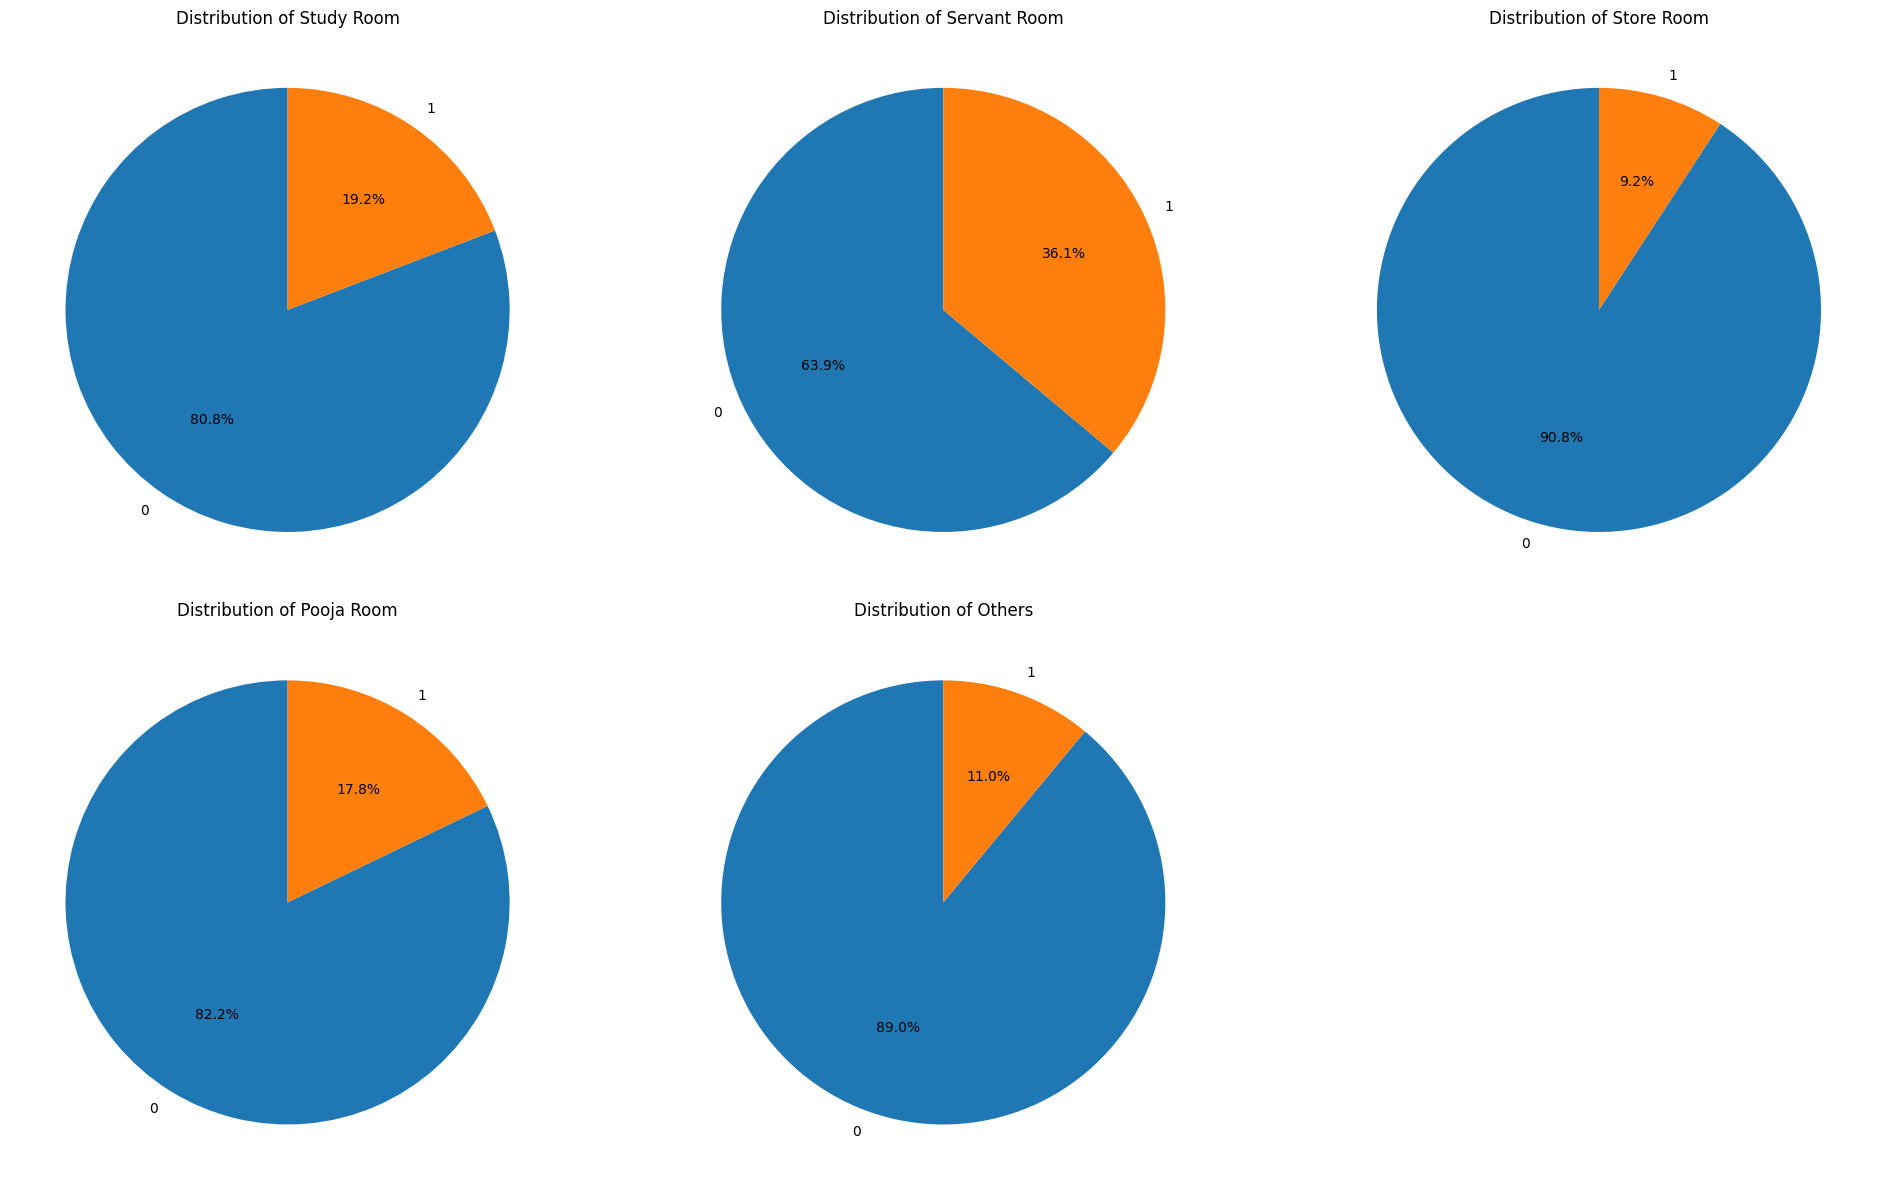

In [77]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

# Furnsihing type

In [78]:
df['furnishing_type'].value_counts()

furnishing_type
2    2411
0    1059
1     207
Name: count, dtype: int64

<Axes: ylabel='count'>

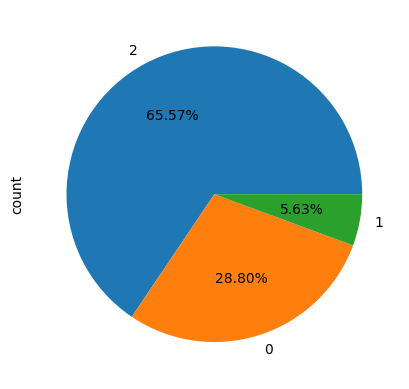

In [79]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

# Luxury score

In [80]:
df['luxury_score'].isnull().sum()

0

In [81]:
df['luxury_score'].describe()

count    3677.000000
mean       71.512918
std        53.059082
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

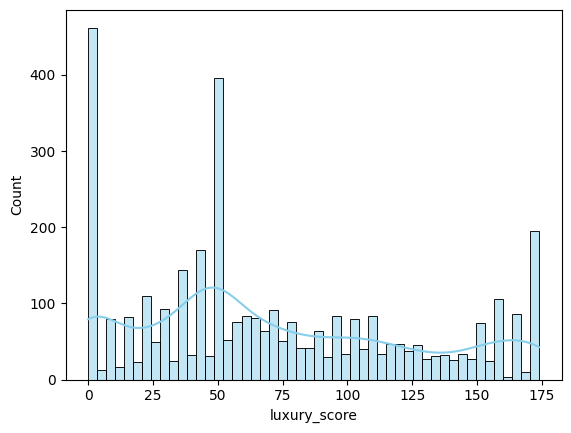

In [82]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='luxury_score'>

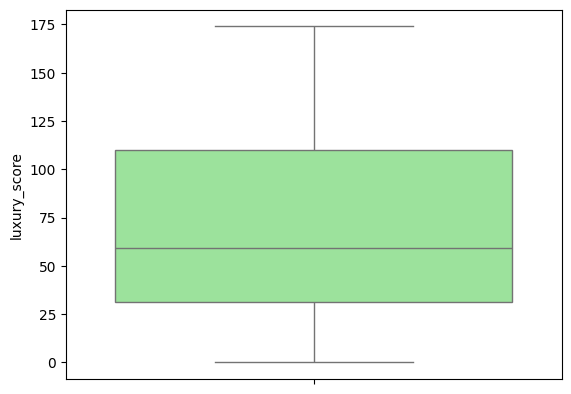

In [83]:
sns.boxplot(df['luxury_score'], color='lightgreen')

In [84]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,price_bins
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,NaN,650.0,0,0,0,0,0,2,8,0-1
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,1103.0,1,1,0,0,0,2,38,0-1
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,58141.0,0,0,0,0,0,2,15,0-1
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,1000.0,585.0,0,0,0,0,0,2,49,0-1
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1615.0,1476.0,0,1,0,0,1,0,174,1-2
